In [4]:
#importing all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [5]:
#Importing dataset
df = pd.read_csv("/content/drive/MyDrive/Major Project 2021/Social_Network_Ads.csv")

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#Checking the number rows which have male and female data
df['Gender'].value_counts().sort_index()
df=df.drop('User ID',axis=1)

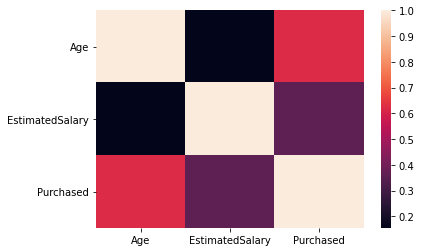

In [9]:
c=df.drop('Gender',axis=1)
ax = sns.heatmap(c.corr())

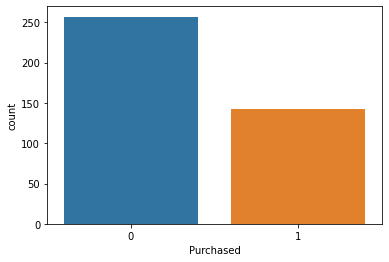

In [10]:
sns.countplot(x="Purchased", data=df)

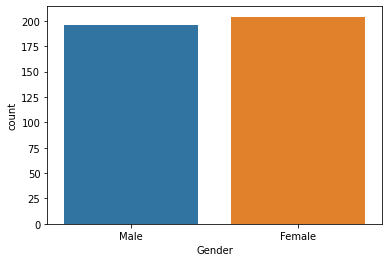

In [11]:
sns.countplot(x="Gender", data=df)

In [12]:
df['Gender']=df['Gender'].str.strip()
df['Gender']=df['Gender'].str.replace('Male','1').str.replace('Female','0')

In [13]:
df['Gender'] = df['Gender'].astype(int)

In [14]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [15]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [17]:
X=df.drop('Purchased',axis=1)
y=df['Purchased']

In [18]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.33,random_state=0)

In [21]:
clf = DecisionTreeClassifier(random_state=0,criterion='gini',max_depth=15,max_features='log2',splitter='best',min_samples_leaf=8).fit(X_train,y_train)
clf.score(X_test,y_test)

0.9166666666666666

In [22]:
roc_auc_score(y, clf.predict_proba(X)[:, 1])

0.9640417947810944

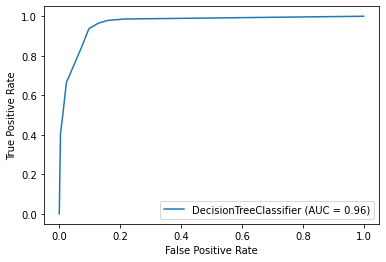

In [23]:
metrics.plot_roc_curve(clf, X, y)
plt.show()

In [24]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.33,random_state=76)
clf1 = make_pipeline(SVC(gamma='auto')).fit(X_train,y_train)
clf1.score(X_test,y_test)

0.6893939393939394

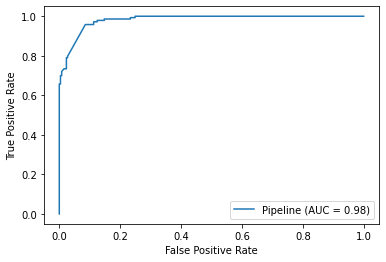

In [25]:
metrics.plot_roc_curve(clf1, X, y)

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras
from keras.optimizers import SGD

In [27]:
model =Sequential()
model.add(Dense(50,input_dim = X_train.shape[1], activation="relu"))
model.add(Dense(350, activation="relu"))
model.add(Dense(260, activation="relu"))
model.add(Dense(180, activation="relu"))
model.add(Dense(90, activation="relu"))
model.add(Dense(1,activation="sigmoid"))
opt = SGD(lr=0.00001)
model.compile(optimizer=opt, loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 350)               17850     
_________________________________________________________________
dense_2 (Dense)              (None, 260)               91260     
_________________________________________________________________
dense_3 (Dense)              (None, 180)               46980     
_________________________________________________________________
dense_4 (Dense)              (None, 90)                16290     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 91        
Total params: 172,671
Trainable params: 172,671
Non-trainable params: 0
__________________________________________________

In [28]:
model.fit(x=X_train, y=y_train, batch_size=100, epochs=200)

Epoch 1/200
3/3 [==============================] - 1s 8ms/step - loss: 2347.2381 - accuracy: 0.5206
Epoch 2/200
3/3 [==============================] - 0s 8ms/step - loss: 1004.8577 - accuracy: 0.4569
Epoch 3/200
3/3 [==============================] - 0s 8ms/step - loss: 1197.2280 - accuracy: 0.5144
Epoch 4/200
3/3 [==============================] - 0s 8ms/step - loss: 403.7273 - accuracy: 0.5131
Epoch 5/200
3/3 [==============================] - 0s 9ms/step - loss: 397.7010 - accuracy: 0.4582
Epoch 6/200
3/3 [==============================] - 0s 8ms/step - loss: 403.6921 - accuracy: 0.5193
Epoch 7/200
3/3 [==============================] - 0s 7ms/step - loss: 148.6707 - accuracy: 0.5518
Epoch 8/200
3/3 [==============================] - 0s 8ms/step - loss: 157.1872 - accuracy: 0.4643
Epoch 9/200
3/3 [==============================] - 0s 9ms/step - loss: 276.7314 - accuracy: 0.3871
Epoch 10/200
3/3 [==============================] - 0s 9ms/step - loss: 94.1280 - accuracy: 0.5655
Epoch 1

In [29]:
model.evaluate(X_test,y_test,verbose=0)

[6.9473748207092285, 0.6666666865348816]

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=100, random_state=0).fit(X_train,y_train)
rf.score(X_test,y_test)

0.946969696969697

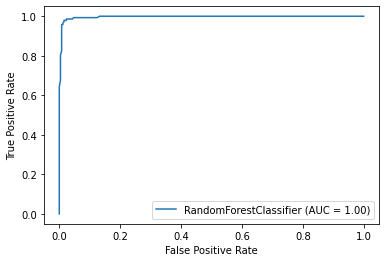

In [31]:
metrics.plot_roc_curve(rf, X, y)

In [32]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9545454545454546

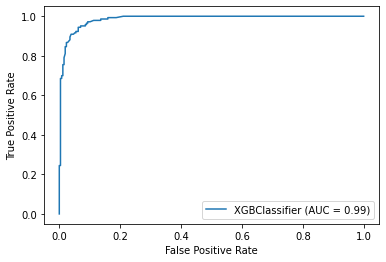

In [33]:
metrics.plot_roc_curve(model, X, y)

-------


In [34]:
df = pd.read_csv("/content/drive/MyDrive/Major Project 2021/organics.csv")

In [35]:
df.head()

,Customer Loyalty ID,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Television Region,Affluence Grade,Age,Frequency,Frequency Percent,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
0,140,U,Midlands,Gold,16.0,C,Wales & West,10,76,1,0.00%,4,0,0,16000.00
1,620,U,Midlands,Gold,35.0,D,Wales & West,4,49,1,0.00%,5,0,0,6000.00
2,868,F,Midlands,Silver,27.0,D,Wales & West,5,70,1,0.00%,8,1,1,0.02
3,1120,M,Midlands,Tin,51.0,F,Midlands,10,65,1,0.00%,7,1,1,0.01
4,2313,F,Midlands,Tin,4.0,A,Midlands,11,68,1,0.00%,8,0,0,0.01


In [36]:
df=df.drop(['Customer Loyalty ID','Television Region'],axis=1)
df.head()

,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Affluence Grade,Age,Frequency,Frequency Percent,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
0,U,Midlands,Gold,16.0,C,10,76,1,0.00%,4,0,0,16000.00
1,U,Midlands,Gold,35.0,D,4,49,1,0.00%,5,0,0,6000.00
2,F,Midlands,Silver,27.0,D,5,70,1,0.00%,8,1,1,0.02
3,M,Midlands,Tin,51.0,F,10,65,1,0.00%,7,1,1,0.01
4,F,Midlands,Tin,4.0,A,11,68,1,0.00%,8,0,0,0.01


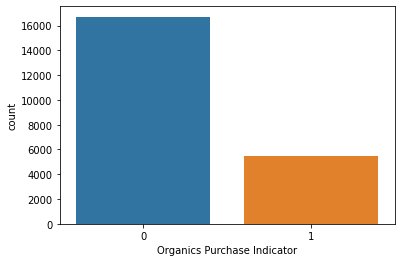

In [37]:
sns.countplot(x="Organics Purchase Indicator", data=df)

In [38]:
x=df['Loyalty Status'].unique()
x=list(x)
x

['Gold', 'Silver', 'Tin', 'Platinum']

In [39]:
df_t=pd.DataFrame()
df_t['a']=df['Loyalty Status']
df_t['b']=df['Organics Purchase Indicator']
df_t.dropna(inplace=True)
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22223 entries, 0 to 22222
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a       22223 non-null  object
 1   b       22223 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 520.9+ KB


In [40]:
a=list(df_t['a'])
b=list(df_t['b'])
f=[]
nf=[]
c=0
n=0
for j in x:
  c=0
  n=0
  for i in range(22223):
    if str(a[i]).lower()==str(j).lower():
      if str(b[i]).lower()=='1':
        c=c+1
      else:
        n=n+1
  f.append(c)
  nf.append(n)

In [41]:
print(x)
print(f)
print(nf)
print(len(x),len(f),len(nf))

['Gold', 'Silver', 'Tin', 'Platinum']
[1236, 2112, 2029, 128]
[5088, 6460, 4458, 712]
4 4 4


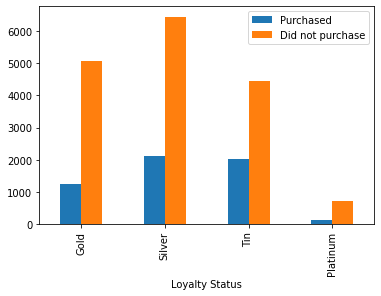

In [42]:
df_g = pd.DataFrame({
    'Loyalty Status': x,
    'Purchased': f,
    'Did not purchase': nf
})
  
# plotting graph
df_g.plot(x="Loyalty Status", y=["Purchased", "Did not purchase"], kind="bar")

In [43]:
x=df['Loyalty Card Tenure'].unique()
x=list(x)
x.remove('.')
for i in range(len(x)):
  x[i]=int(x[i])
x.sort()
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39]


In [44]:
x=df['Affluence Grade'].unique()
x=list(x)
x.remove('.')
for i in range(len(x)):
  x[i]=int(x[i])
x.sort()
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34]


In [45]:
df_t=pd.DataFrame()
df_t['a']=df['Affluence Grade']
df_t['b']=df['Organics Purchase Indicator']
df_t.dropna(inplace=True)
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22223 entries, 0 to 22222
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a       22223 non-null  object
 1   b       22223 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 520.9+ KB


In [46]:
a=list(df_t['a'])
b=list(df_t['b'])
f=[]
nf=[]
c=0
n=0
for j in x:
  c=0
  n=0
  for i in range(22223):
    if str(a[i]).lower()==str(j).lower():
      if str(b[i]).lower()=='1':
        c=c+1
      else:
        n=n+1
  f.append(c)
  nf.append(n)

In [47]:
print(x)
print(f)
print(nf)
print(len(x),len(f),len(nf))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34]
[0, 0, 10, 45, 74, 172, 303, 397, 498, 605, 586, 533, 463, 388, 312, 237, 167, 105, 70, 63, 58, 36, 25, 17, 15, 13, 6, 5, 1, 3, 3, 2, 1]
[6, 36, 190, 488, 909, 1490, 1931, 2191, 2136, 1979, 1586, 1143, 778, 468, 282, 166, 78, 40, 19, 8, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
33 33 33


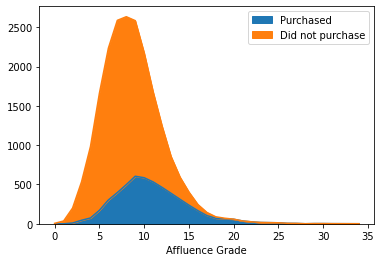

In [48]:
df_g = pd.DataFrame({
    'Affluence Grade': x,
    'Purchased': f,
    'Did not purchase': nf
})
  
# plotting graph
df_g.plot(x="Affluence Grade", y=["Purchased", "Did not purchase"], kind="area")

In [49]:
x=df['Age'].unique()
x=list(x)
x.remove('.')
for i in range(len(x)):
  x[i]=int(x[i])
x.sort()
print(x)

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]


In [50]:
df_t=pd.DataFrame()
df_t['a']=df['Age']
df_t['b']=df['Organics Purchase Indicator']
df_t.dropna(inplace=True)
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22223 entries, 0 to 22222
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a       22223 non-null  object
 1   b       22223 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 520.9+ KB


In [51]:
a=list(df_t['a'])
b=list(df_t['b'])
f=[]
nf=[]
c=0
n=0
for j in x:
  c=0
  n=0
  for i in range(22223):
    if str(a[i]).lower()==str(j).lower():
      if str(b[i]).lower()=='1':
        c=c+1
      else:
        n=n+1
  f.append(c)
  nf.append(n)

In [52]:
print(x)
print(f)
print(nf)
print(len(x),len(f),len(nf))

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
[0, 0, 7, 4, 11, 15, 15, 25, 30, 51, 53, 77, 94, 112, 153, 159, 177, 207, 197, 250, 194, 216, 146, 156, 156, 175, 184, 19, 79, 83, 73, 74, 78, 95, 83, 73, 80, 83, 73, 62, 75, 77, 69, 86, 69, 69, 72, 67, 62, 55, 80, 59, 56, 50, 43, 46, 46, 45, 41, 52, 36, 26]
[5, 10, 3, 4, 7, 8, 6, 21, 17, 25, 51, 46, 74, 99, 84, 134, 108, 141, 135, 156, 140, 129, 236, 237, 224, 259, 266, 430, 382, 447, 455, 439, 514, 515, 457, 464, 435, 422, 375, 406, 414, 433, 456, 406, 390, 440, 388, 419, 404, 386, 339, 323, 321, 304, 280, 276, 279, 220, 261, 218, 169, 123]
62 62 62


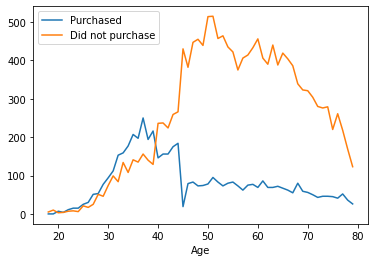

In [53]:
df_g = pd.DataFrame({
    'Age': x,
    'Purchased': f,
    'Did not purchase': nf
})
  
# plotting graph
df_g.plot(x="Age", y=["Purchased", "Did not purchase"], kind="line")

In [54]:
df_t=df

In [55]:
df_t.isnull().sum()

Gender                          2512
Geographic Region                465
Loyalty Status                     0
Neigborhood Cluster-55 Level     674
Neighborhood Cluster-7 Level     674
Affluence Grade                    0
Age                                0
Frequency                          0
Frequency Percent                  0
Loyalty Card Tenure                0
Organics Purchase Count            0
Organics Purchase Indicator        0
Total Spend                        0
dtype: int64

In [56]:
#df_t=df_t.fillna(method='ffill')
df_t=df_t.dropna()

In [57]:
df_t.isnull().sum()

Gender                          0
Geographic Region               0
Loyalty Status                  0
Neigborhood Cluster-55 Level    0
Neighborhood Cluster-7 Level    0
Affluence Grade                 0
Age                             0
Frequency                       0
Frequency Percent               0
Loyalty Card Tenure             0
Organics Purchase Count         0
Organics Purchase Indicator     0
Total Spend                     0
dtype: int64

In [58]:
le = LabelEncoder()
df_t['Gender']=le.fit_transform(df_t['Gender'])
df_t['Geographic Region']=le.fit_transform(df_t['Geographic Region'])
df_t['Loyalty Status']=le.fit_transform(df_t['Loyalty Status'])
df_t['Neighborhood Cluster-7 Level']=le.fit_transform(df_t['Neighborhood Cluster-7 Level'])
df_t.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Affluence Grade,Age,Frequency,Frequency Percent,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
0,2,0,0,16.0,2,10,76,1,0.00%,4,0,0,16000.00
1,2,0,0,35.0,3,4,49,1,0.00%,5,0,0,6000.00
2,0,0,2,27.0,3,5,70,1,0.00%,8,1,1,0.02
3,1,0,3,51.0,5,10,65,1,0.00%,7,1,1,0.01
4,0,0,3,4.0,0,11,68,1,0.00%,8,0,0,0.01


In [59]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18696 entries, 0 to 22221
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        18696 non-null  int64  
 1   Geographic Region             18696 non-null  int64  
 2   Loyalty Status                18696 non-null  int64  
 3   Neigborhood Cluster-55 Level  18696 non-null  float64
 4   Neighborhood Cluster-7 Level  18696 non-null  int64  
 5   Affluence Grade               18696 non-null  object 
 6   Age                           18696 non-null  object 
 7   Frequency                     18696 non-null  int64  
 8   Frequency Percent             18696 non-null  object 
 9   Loyalty Card Tenure           18696 non-null  object 
 10  Organics Purchase Count       18696 non-null  int64  
 11  Organics Purchase Indicator   18696 non-null  int64  
 12  Total Spend                   18696 non-null  float64
dtypes

In [60]:
df_t['Frequency Percent']=df_t['Frequency Percent'].str.strip("%")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
df_t['Affluence Grade'].value_counts()

8     2194
9     2174
7     2136
6     1873
10    1853
11    1400
5     1378
12    1076
.      910
4      809
13     737
14     514
3      445
15     353
16     217
2      164
17     128
18      81
19      59
20      50
1       31
21      30
22      22
24      14
23      13
25      12
26       5
27       5
0        4
29       3
30       2
31       2
28       1
34       1
Name: Affluence Grade, dtype: int64

In [62]:
df_t['Age'].unique()

array(['76', '49', '70', '65', '68', '72', '74', '62', '60', '.', '51',
       '64', '37', '54', '42', '66', '46', '75', '43', '50', '35', '71',
       '44', '31', '58', '47', '39', '61', '57', '45', '18', '56', '67',
       '78', '48', '53', '52', '55', '41', '34', '40', '79', '38', '27',
       '59', '26', '36', '63', '69', '73', '33', '30', '29', '32', '22',
       '77', '25', '28', '23', '20', '24', '19', '21'], dtype=object)

In [63]:
df_t['Frequency Percent'].unique()

array(['0.00'], dtype=object)

In [64]:
df_t['Loyalty Card Tenure'].unique()

array(['4', '5', '8', '7', '3', '2', '1', '11', '9', '12', '15', '6',
       '19', '24', '10', '17', '.', '0', '18', '13', '32', '27', '22',
       '30', '20', '16', '31', '28', '23', '14', '29', '21', '25', '26',
       '36', '35', '33', '38', '34'], dtype=object)

In [65]:
df_t['Affluence Grade']=df_t['Affluence Grade'].replace(".",np.nan)
df_t['Age']=df_t['Age'].replace(".",np.nan)
df_t['Loyalty Card Tenure']=df_t['Loyalty Card Tenure'].replace(".",np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [66]:
#df_t=df_t.fillna(df_t.median())
df_t=df_t.dropna()

In [67]:
df_t.isnull().sum()

Gender                          0
Geographic Region               0
Loyalty Status                  0
Neigborhood Cluster-55 Level    0
Neighborhood Cluster-7 Level    0
Affluence Grade                 0
Age                             0
Frequency                       0
Frequency Percent               0
Loyalty Card Tenure             0
Organics Purchase Count         0
Organics Purchase Indicator     0
Total Spend                     0
dtype: int64

In [68]:
df_t['Affluence Grade'] = df_t['Affluence Grade'].astype(int)
df_t['Age'] = df_t['Age'].astype(int)
df_t['Frequency Percent']=df_t['Frequency Percent'].replace("0.00",0)
df_t['Loyalty Card Tenure'] = df_t['Loyalty Card Tenure'].astype(int)
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16408 entries, 0 to 22221
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        16408 non-null  int64  
 1   Geographic Region             16408 non-null  int64  
 2   Loyalty Status                16408 non-null  int64  
 3   Neigborhood Cluster-55 Level  16408 non-null  float64
 4   Neighborhood Cluster-7 Level  16408 non-null  int64  
 5   Affluence Grade               16408 non-null  int64  
 6   Age                           16408 non-null  int64  
 7   Frequency                     16408 non-null  int64  
 8   Frequency Percent             16408 non-null  int64  
 9   Loyalty Card Tenure           16408 non-null  int64  
 10  Organics Purchase Count       16408 non-null  int64  
 11  Organics Purchase Indicator   16408 non-null  int64  
 12  Total Spend                   16408 non-null  float64
dtypes

In [71]:
df_t.corr()

,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Affluence Grade,Age,Frequency,Frequency Percent,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
Gender,1.000000,-0.005719,-0.025600,-0.021240,-0.022812,-0.094009,0.069569,NaN,NaN,0.016355,-0.209493,-0.228809,0.020556
Geographic Region,-0.005719,1.000000,-0.023751,-0.158939,-0.154533,-0.008790,0.002317,NaN,NaN,0.031517,0.004954,0.002002,0.027237
Loyalty Status,-0.025600,-0.023751,1.000000,0.160483,0.159481,0.058131,-0.360334,NaN,NaN,-0.003391,0.110889,0.107916,-0.537132
Neigborhood Cluster-55 Level,-0.021240,-0.158939,0.160483,1.000000,0.984217,0.036113,-0.178039,NaN,NaN,-0.054799,0.068369,0.066520,-0.106347
Neighborhood Cluster-7 Level,-0.022812,-0.154533,0.159481,0.984217,1.000000,0.036067,-0.175003,NaN,NaN,-0.055358,0.066751,0.065831,-0.103998
Affluence Grade,-0.094009,-0.008790,0.058131,0.036113,0.036067,1.000000,-0.145413,NaN,NaN,-0.033756,0.475300,0.368374,-0.033755
Age,0.069569,0.002317,-0.360334,-0.178039,-0.175003,-0.145413,1.000000,NaN,NaN,0.213042,-0.314218,-0.307040,0.276854
Frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frequency Percent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loyalty Card Tenure,0.016355,0.031517,-0.003391,-0.054799,-0.055358,-0.033756,0.213042,NaN,NaN,1.000000,-0.057128,-0.057431,0.037702


In [73]:
df_T.hist(figsize=(12,12))

NameError: ignored

In [74]:
X = df_t.drop(['Organics Purchase Indicator','Organics Purchase Count','Frequency','Frequency Percent'],axis=1)
y = df_t['Organics Purchase Indicator']
#X= preprocessing.scale(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [75]:
clf = DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=7,splitter='best',min_samples_leaf=10).fit(X_train,y_train)
clf.score(X_test,y_test)

0.8098720292504571

In [76]:
roc_auc_score(y, clf.predict_proba(X)[:, 1])

0.8326587538312795

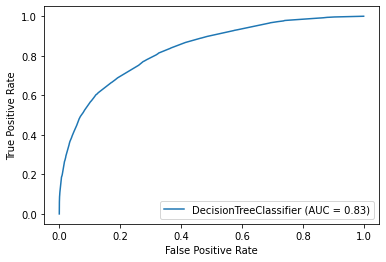

In [77]:
metrics.plot_roc_curve(clf, X, y)
plt.show()

In [78]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
clf1 = make_pipeline(SVC(gamma='auto')).fit(X_train,y_train)
clf1.score(X_test,y_test)

0.7536055250863295

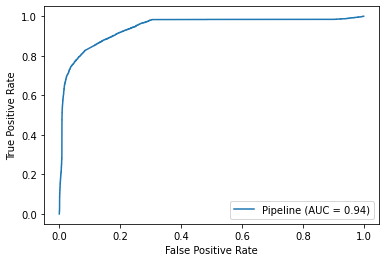

In [79]:
metrics.plot_roc_curve(clf1, X, y)

In [80]:
model =Sequential()
model.add(Dense(50,input_dim = X_train.shape[1], activation="relu"))
model.add(Dense(350, activation="relu"))
model.add(Dense(260, activation="relu"))
model.add(Dense(180, activation="relu"))
model.add(Dense(90, activation="relu"))
model.add(Dense(1,activation="sigmoid"))
opt = SGD(lr=0.00001)
model.compile(optimizer=opt, loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                500       
_________________________________________________________________
dense_7 (Dense)              (None, 350)               17850     
_________________________________________________________________
dense_8 (Dense)              (None, 260)               91260     
_________________________________________________________________
dense_9 (Dense)              (None, 180)               46980     
_________________________________________________________________
dense_10 (Dense)             (None, 90)                16290     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 91        
Total params: 172,971
Trainable params: 172,971
Non-trainable params: 0
________________________________________________

In [81]:
model.fit(x=X_train, y=y_train, batch_size=128, epochs=400)

Epoch 1/400
90/90 [==============================] - 1s 6ms/step - loss: 15.5126 - accuracy: 0.6865
Epoch 2/400
90/90 [==============================] - 1s 6ms/step - loss: 9.6412 - accuracy: 0.6527
Epoch 3/400
90/90 [==============================] - 1s 6ms/step - loss: 9.0943 - accuracy: 0.6554
Epoch 4/400
90/90 [==============================] - 1s 6ms/step - loss: 8.5968 - accuracy: 0.6357
Epoch 5/400
90/90 [==============================] - 1s 6ms/step - loss: 6.1636 - accuracy: 0.6636
Epoch 6/400
90/90 [==============================] - 1s 6ms/step - loss: 7.0529 - accuracy: 0.6525
Epoch 7/400
90/90 [==============================] - 1s 6ms/step - loss: 4.4093 - accuracy: 0.6690
Epoch 8/400
90/90 [==============================] - 1s 7ms/step - loss: 4.1161 - accuracy: 0.6838
Epoch 9/400
90/90 [==============================] - 1s 6ms/step - loss: 5.1072 - accuracy: 0.6558
Epoch 10/400
90/90 [==============================] - 1s 6ms/step - loss: 4.4706 - accuracy: 0.6636
Epoch 11

In [82]:
model.evaluate(X_test,y_test,verbose=0)

[0.5735225677490234, 0.7115579843521118]

In [83]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1620)
rf = RandomForestClassifier(max_depth=100, random_state=0).fit(X_train,y_train)
rf.score(X_test,y_test)

0.8141377209018891

In [84]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.828559821247207

In [85]:
#Hyperparameter tuning
"""
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':np.arange( 1, 10+1, 1 ).tolist(),'n_estimators':np.arange( 100, 1000+1, 100 ).tolist(),'booster':['gbtree', 'gblinear','dart']}
grid = GridSearchCV(model, parameters, n_jobs=-1,verbose=2, refit=True)
grid.fit(X_train, y_train) 
print(grid.best_params_)
"""

"\nfrom sklearn.model_selection import GridSearchCV\nparameters = {'max_depth':np.arange( 1, 10+1, 1 ).tolist(),'n_estimators':np.arange( 100, 1000+1, 100 ).tolist(),'booster':['gbtree', 'gblinear','dart']}\ngrid = GridSearchCV(model, parameters, n_jobs=-1,verbose=2, refit=True)\ngrid.fit(X_train, y_train) \nprint(grid.best_params_)\n"

-------

In [86]:
df = pd.read_csv("/content/drive/MyDrive/Major Project 2021/online_shoppers_intention.csv")

In [87]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [89]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

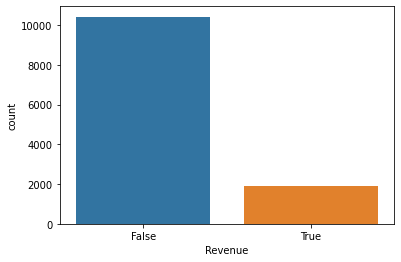

In [90]:
sns.countplot(x="Revenue", data=df)

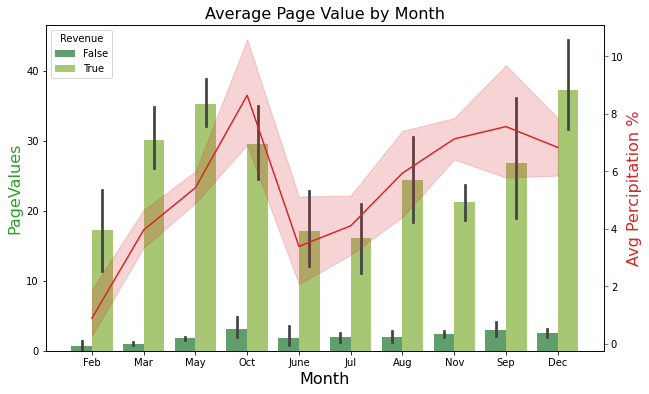

In [91]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Average Page Value by Month', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 = sns.barplot(x='Month', y='PageValues', data = df, palette='summer',hue='Revenue')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.lineplot(x='Month', y='PageValues', data = df, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

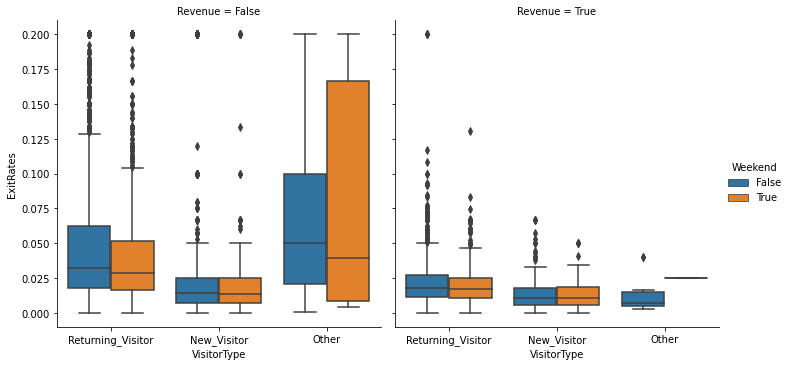

In [92]:
sns.catplot(x="VisitorType", y="ExitRates",hue="Weekend", col="Revenue",data=df, kind="box")

In [93]:
df_t=df

In [94]:
le = LabelEncoder()
df_t['Month']=le.fit_transform(df_t['Month'])
df_t['VisitorType']=le.fit_transform(df_t['VisitorType'])
df_t['Weekend']=le.fit_transform(df_t['Weekend'])
df_t['Revenue']=le.fit_transform(df_t['Revenue'])
df_t.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [95]:
df_t.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,0.048560,-0.006347,-0.025035,-0.005487,-0.033561,-0.025820,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.029061,-0.007343,-0.015392,-0.005561,-0.014376,-0.023940,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,0.019743,-0.009527,-0.038235,-0.029169,-0.034491,0.055828,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.005987,-0.009579,-0.019285,-0.027144,-0.024675,0.044677,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.070299,0.004290,-0.013146,-0.038122,-0.043064,0.126656,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.061186,0.002976,-0.007380,-0.033091,-0.036377,0.119329,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.023763,0.023823,-0.015772,-0.006485,0.078286,0.135536,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.039049,0.014567,-0.004442,-0.008907,0.078616,0.179144,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.021780,0.018508,0.045592,0.011315,0.012532,-0.111228,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.079341,0.012652,0.003499,-0.016098,0.052301,0.085557,-0.016767,-0.082305


In [96]:
X = df_t.drop(['Revenue'],axis=1)
y = df_t['Revenue']
#X= preprocessing.scale(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [97]:
clf = DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=7,splitter='best',min_samples_leaf=10).fit(X_train,y_train)
clf.score(X_test,y_test)

0.8972695323060287

In [98]:
roc_auc_score(y, clf.predict_proba(X)[:, 1])

0.9334033804880582

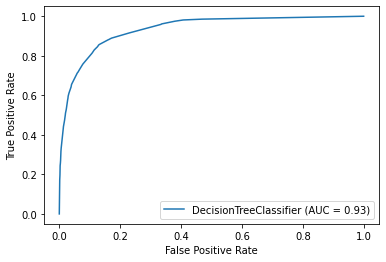

In [99]:
metrics.plot_roc_curve(clf, X, y)
plt.show()

In [100]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
clf1 = make_pipeline(SVC(gamma='auto')).fit(X_train,y_train)
clf1.score(X_test,y_test)

0.8513111651797783

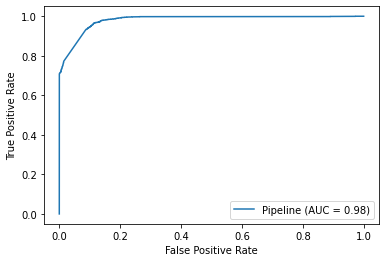

In [101]:
metrics.plot_roc_curve(clf1, X, y)

In [102]:
model =Sequential()
model.add(Dense(50,input_dim = X_train.shape[1], activation="relu"))
model.add(Dense(350, activation="relu"))
model.add(Dense(260, activation="relu"))
model.add(Dense(180, activation="relu"))
model.add(Dense(90, activation="relu"))
model.add(Dense(1,activation="sigmoid"))
opt = SGD(lr=0.00001)
model.compile(optimizer=opt, loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 50)                900       
_________________________________________________________________
dense_13 (Dense)             (None, 350)               17850     
_________________________________________________________________
dense_14 (Dense)             (None, 260)               91260     
_________________________________________________________________
dense_15 (Dense)             (None, 180)               46980     
_________________________________________________________________
dense_16 (Dense)             (None, 90)                16290     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 91        
Total params: 173,371
Trainable params: 173,371
Non-trainable params: 0
________________________________________________

In [103]:
model.fit(x=X_train, y=y_train, batch_size=128, epochs=50)

Epoch 1/50
68/68 [==============================] - 1s 6ms/step - loss: 5.9602 - accuracy: 0.7259
Epoch 2/50
68/68 [==============================] - 0s 6ms/step - loss: 1.1036 - accuracy: 0.5456
Epoch 3/50
68/68 [==============================] - 0s 6ms/step - loss: 1.0537 - accuracy: 0.5437
Epoch 4/50
68/68 [==============================] - 0s 6ms/step - loss: 0.9692 - accuracy: 0.5463
Epoch 5/50
68/68 [==============================] - 0s 6ms/step - loss: 0.9260 - accuracy: 0.5797
Epoch 6/50
68/68 [==============================] - 0s 6ms/step - loss: 0.9147 - accuracy: 0.6285
Epoch 7/50
68/68 [==============================] - 0s 6ms/step - loss: 0.8063 - accuracy: 0.6273
Epoch 8/50
68/68 [==============================] - 0s 6ms/step - loss: 0.7895 - accuracy: 0.6503
Epoch 9/50
68/68 [==============================] - 0s 6ms/step - loss: 0.7934 - accuracy: 0.6643
Epoch 10/50
68/68 [==============================] - 0s 6ms/step - loss: 0.7765 - accuracy: 0.6811
Epoch 11/50
68/68 [

In [104]:
model.evaluate(X_test,y_test,verbose=0)

[0.5299054980278015, 0.8780751824378967]

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=100, random_state=0).fit(X_train,y_train)
rf.score(X_test,y_test)

0.9029467423628007

In [106]:
from xgboost import XGBClassifier

model = XGBClassifier(reg_alpha=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)#13

0.9059205190592052

In [107]:
#Hyperparameter tuning
"""
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':np.arange( 1, 10+1, 1 ).tolist(),'n_estimators':np.arange( 100, 1000+1, 100 ).tolist(),'booster':['gbtree', 'gblinear','dart']}
grid = GridSearchCV(model, parameters, n_jobs=-1,verbose=2, refit=True)
grid.fit(X_train, y_train) 
print(grid.best_params_)
"""

"\nfrom sklearn.model_selection import GridSearchCV\nparameters = {'max_depth':np.arange( 1, 10+1, 1 ).tolist(),'n_estimators':np.arange( 100, 1000+1, 100 ).tolist(),'booster':['gbtree', 'gblinear','dart']}\ngrid = GridSearchCV(model, parameters, n_jobs=-1,verbose=2, refit=True)\ngrid.fit(X_train, y_train) \nprint(grid.best_params_)\n"

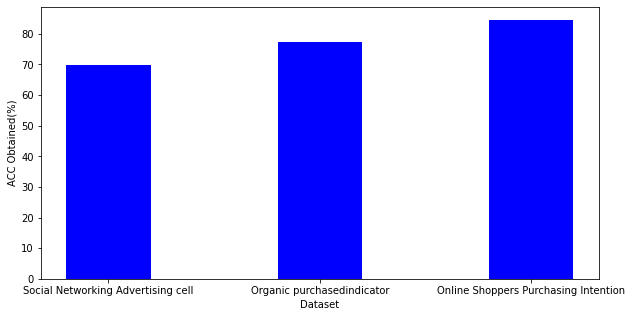

In [108]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Social Networking Advertising cell':69.93, 'Organic purchasedindicator':77.36, 'Online Shoppers Purchasing Intention':84.55,
		}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='blue',
		width = 0.4)

plt.xlabel("Dataset")
plt.ylabel("ACC Obtained(%)")
plt.show()
